# Relevant Imports

In [16]:

import math
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy import stats

# Problem 1: Extending the Lady Tasting Tea



The problem is given as below:

<i>
Let's extend the Lady Tasting Tea experiment as follows. The original experiment has 8 cups: 4 tea-first and 4 milk-first. Suppose we prepare 12 cups: 8 tea-first and 4 milk-first. A participant claims they can tell which was poured first.
</i>


<i>
Simulate this experiment using numpy by randomly shuffling the cups many times and calculating the probability of the participant correctly identifying all cups by chance. Compare your result with the original 8-cup experiment.
</i>

<i>
In your notebook, explain your simulation process clearly, report and interpret the estimated probability, and discuss whether, based on this probability, you would consider extending or relaxing the p-value threshold compared to the original design.
</i>

### 1) Exact probability (combinatorics)

If someone is guessing, they are effectively choosing **4 cups out of 12**.








In [17]:
n_cups = 12
milk_first = 4

total_guesses = math.comb(n_cups, milk_first)
p_all_correct = 1 / total_guesses

total_guesses, p_all_correct


(495, 0.00202020202020202)

There are 495 different ways that the participant could guess which 4 cups were milk first. The chances of getting them all correct is 1/495 ≈ 0.00202...

### 2) Simulation check (Monte Carlo)

We simulate:
1. The **true** set of milk-first cups (4 cups)
2. A random **guess** of 4 cups
3. Count how many cups overlap between guess and truth (0 to 4)

We repeat many times and estimate the probability of getting **all 4 correct**.


In [18]:
rng = np.random.default_rng(42)

trials = 200_000
cups = np.arange(n_cups)

all_correct_count = 0
overlap_counts = np.zeros(milk_first + 1, dtype=int)  # index 0..4

for _ in range(trials):
    truth = set(rng.choice(cups, size=milk_first, replace=False))
    guess = set(rng.choice(cups, size=milk_first, replace=False))
    overlap = len(truth.intersection(guess))
    overlap_counts[overlap] += 1
    if overlap == milk_first:
        all_correct_count += 1

p_hat = all_correct_count / trials

p_all_correct, p_hat, overlap_counts


(0.00202020202020202, 0.00211, array([28254, 90225, 68126, 12973,   422]))

### 3) Visualise the overlap distribution

This shows how often the guess got **0, 1, 2, 3, or 4** cups correct.


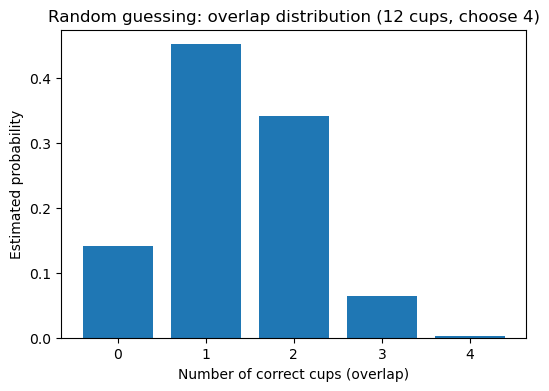

In [19]:
x = np.arange(milk_first + 1)
y = overlap_counts / trials

plt.figure(figsize=(6, 4))
plt.bar(x, y)
plt.xticks(x)
plt.xlabel('Number of correct cups (overlap)')
plt.ylabel('Estimated probability')
plt.title('Random guessing: overlap distribution (12 cups, choose 4)')
plt.show()


### Conclusion

- There are 495 possible ways to pick 4 cups from 12.
- Only **one** of those picks is perfectly correct.
- So the chance of getting **all 4 correct by guessing** is:
  - \(1/495 \approx 0.00202\) → about **0.2%**.

The simulation estimate should be close to that exact value.


## End

# Problem 2: Normal Distribution

The problem given:

<i>
Generate 100,000 samples of size 10 from the standard normal distribution. For each sample, compute the standard deviation with ddof=1 (sample SD) and with ddof=0 (population SD). Plot histograms of both sets of values on the same axes with transparency. Describe the differences you see. Explain how you expect these differences to change if the sample size is increased.
</i>

Brreakdown:

- Generate 100,000 samples from a Normal(0, 1) distribution.
- Compare the distribution of the sample standard deviation when using:
  - ddof = 0 (population formula)
  - ddof = 1 (sample formula / Bessel's correction)
- Repeat for a much larger sample size to show the difference shrinks.

In [20]:
rng = np.random.default_rng(42)

num_samples = 100_000
mu, sigma = 0, 1

num_samples, mu, sigma

(100000, 0, 1)

## A: Sample size n = 10

We draw 100,000 samples, each containing 10 values from Normal(0,1), then compute the SD for each sample.

In [21]:
n = 10
data = rng.normal(loc=mu, scale=sigma, size=(num_samples, n))

sd_ddof0 = np.std(data, axis=1, ddof=0)
sd_ddof1 = np.std(data, axis=1, ddof=1)

sd_ddof0.mean(), sd_ddof1.mean()

(np.float64(0.923425263397907), np.float64(0.9733756937594341))

In [22]:
print(f"n = {n}")
print(f"mean SD (ddof=0): {sd_ddof0.mean():.4f}")
print(f"mean SD (ddof=1): {sd_ddof1.mean():.4f}")
print(f"Difference (ddof=1 - ddof=0): {(sd_ddof1.mean()-sd_ddof0.mean()):.4f}")

n = 10
mean SD (ddof=0): 0.9234
mean SD (ddof=1): 0.9734
Difference (ddof=1 - ddof=0): 0.0500


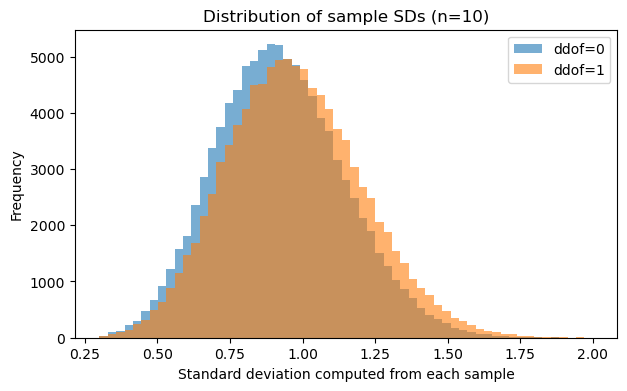

In [23]:
plt.figure(figsize=(7, 4))
bins = np.linspace(0.3, 2.0, 60)
plt.hist(sd_ddof0, bins=bins, alpha=0.6, label="ddof=0")
plt.hist(sd_ddof1, bins=bins, alpha=0.6, label="ddof=1")
plt.xlabel("Standard deviation computed from each sample")
plt.ylabel("Frequency")
plt.title("Distribution of sample SDs (n=10)")
plt.legend()
plt.show()

## B: Larger sample size n = 1000

Now we repeat with n=1000 per sample. The two formulas should become much closer.


In [24]:
n_big = 1000
data_big = rng.normal(loc=mu, scale=sigma, size=(num_samples, n_big))

sd0_big = np.std(data_big, axis=1, ddof=0)
sd1_big = np.std(data_big, axis=1, ddof=1)

print(f"n = {n_big}")
print(f"mean SD (ddof=0): {sd0_big.mean():.4f}")
print(f"mean SD (ddof=1): {sd1_big.mean():.4f}")
print(f"Difference (ddof=1 - ddof=0): {(sd1_big.mean()-sd0_big.mean()):.6f}")

n = 1000
mean SD (ddof=0): 0.9992
mean SD (ddof=1): 0.9997
Difference (ddof=1 - ddof=0): 0.000500


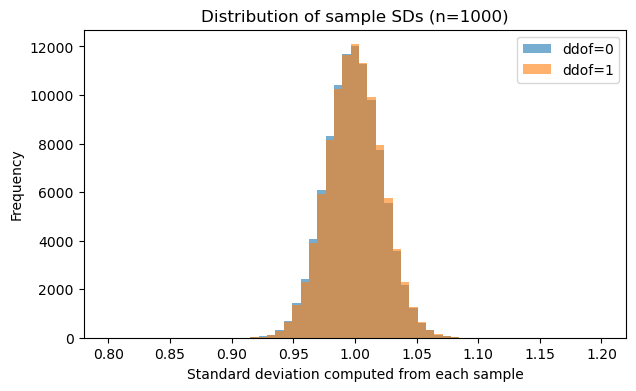

In [25]:
plt.figure(figsize=(7, 4))
bins = np.linspace(0.8, 1.2, 60)
plt.hist(sd0_big, bins=bins, alpha=0.6, label="ddof=0")
plt.hist(sd1_big, bins=bins, alpha=0.6, label="ddof=1")
plt.xlabel("Standard deviation computed from each sample")
plt.ylabel("Frequency")
plt.title("Distribution of sample SDs (n=1000)")
plt.legend()
plt.show()

## Conclusion

- For **small samples** (like n=10), `ddof=1` tends to produce **slightly larger** SD values than `ddof=0`.
- For **large samples** (like n=1000), the difference becomes **tiny**, because dividing by n vs (n−1) is almost the same.

So:
- Use **ddof=1** when estimating population variability from a sample (common in statistics).
- Use **ddof=0** when you truly treat the data as the entire population.

# END

# Problem 3: t-Tests

Problem: 

<i>
A type II error occurs when a test fails to reject the null hypothesis even though it is false. For each mean difference d = 0, 0.1, 0.2, …, 1.0, repeat the following simulation 1,000 times:
</i>



<i>

1. Draw two samples of size 100, one from the standard normal distribution and one from the normal distribution with mean d and standard deviation 1.

2. Run an independent samples t-test on the two samples, rejecting the null hypothesis if the p-value is less than 0.05.

3. Record the proportion of times the null hypothesis is not rejected.


<i>
Plot this proportion against d, and explain how the type II error rate changes as the difference in means increases.
</i>

Goal :
- Simulate two independent groups:
  - Group A ~ Normal(0, 1)
  - Group B ~ Normal(d, 1)
- For a range of effect sizes d = 0.0 to 1.0 (step 0.1), run many repeated experiments.
- Each experiment uses an independent two-sample t-test.
- Estimate:
  - Type II error (β) ≈ proportion of experiments where we fail to reject H₀
  - Power = 1 − β

Hypotheses:
- H₀: μA = μB
- H₁: μA ≠ μB (two-sided)

In [26]:

rng = np.random.default_rng(42)

ds = np.round(np.arange(0.0, 1.01, 0.1), 2)   
k = 1000                                     
alpha = 0.05                                 
n = 100                                      

ds, k, alpha, n

(array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 1000,
 0.05,
 100)

## Simulation

For each effect size d:
1. Repeat k times
2. Generate Group A and Group B
3. Run `ttest_ind` (two-sample t-test)
4. Count how often we fail to reject (p ≥ α)

In [27]:
results = []

for d in ds:
    fail_to_reject = 0
    
    for _ in range(k):
        group_a = rng.normal(loc=0.0, scale=1.0, size=n)
        group_b = rng.normal(loc=d,   scale=1.0, size=n)
        
        t_stat, p_value = stats.ttest_ind(group_a, group_b, equal_var=True)
        
        if p_value >= alpha:
            fail_to_reject += 1
    
    prop_fail = fail_to_reject / k         
    power = 1.0 - prop_fail                
    results.append((d, prop_fail, power))

df = pd.DataFrame(results, columns=["d", "type_II_est (fail to reject)", "power_est"])
df

,d,type_II_est (fail to reject),power_est
0,0.0,0.941,0.059
1,0.1,0.890,0.110
2,0.2,0.715,0.285
3,0.3,0.435,0.565
4,0.4,0.202,0.798
5,0.5,0.050,0.950
6,0.6,0.017,0.983
7,0.7,0.002,0.998
8,0.8,0.000,1.000
9,0.9,0.000,1.000


## Plot: estimated Type II error vs effect size

As d increases, the groups are more separated, so the test becomes more likely to reject H₀.
That means Type II error should go down and power should go up.

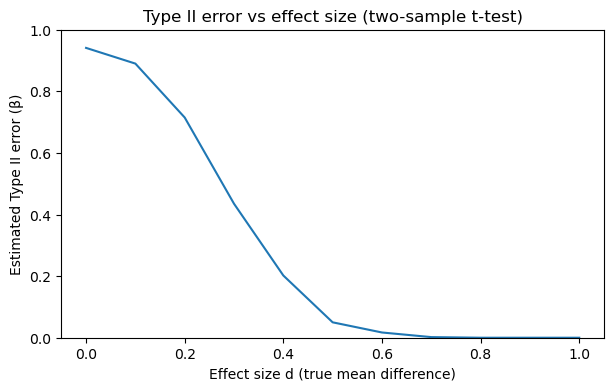

In [28]:
plt.figure(figsize=(7, 4))
plt.plot(df["d"], df["type_II_est (fail to reject)"])
plt.xlabel("Effect size d (true mean difference)")
plt.ylabel("Estimated Type II error (β)")
plt.title("Type II error vs effect size (two-sample t-test)")
plt.ylim(0, 1)
plt.show()

## Plot: estimated power vs effect size

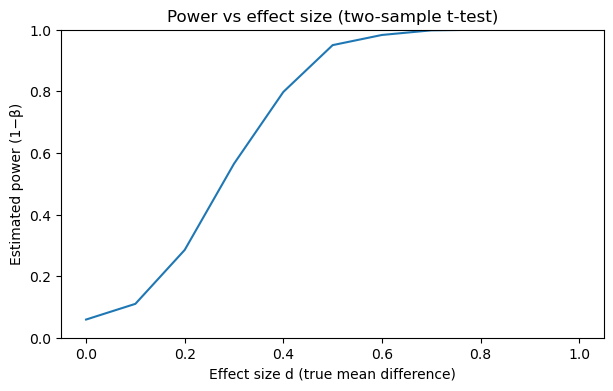

In [29]:
plt.figure(figsize=(7, 4))
plt.plot(df["d"], df["power_est"])
plt.xlabel("Effect size d (true mean difference)")
plt.ylabel("Estimated power (1−β)")
plt.title("Power vs effect size (two-sample t-test)")
plt.ylim(0, 1)
plt.show()

## Conclusion

- When d = 0, the groups have the same mean, so the test usually fails to reject (β is high).
- As d increases, the difference becomes easier to detect.
- This makes β decrease and power increase.

This simulation gives an empirical way to see how effect size impacts power for a fixed sample size n and significance level α.

# Problem 4: ANOVA


Problem:

<i>
Generate three independent samples, each of size 30, from normal distributions with means 0, 0.5, and 1, each with standard deviation 1.
</i>

<i>

1. Perform a one-way ANOVA to test whether all three means are equal.
2. Perform three independent two-sample t-tests: samples 1 vs 2, 1 vs 3, and 2 vs 3.
3. Compare the conclusions.

</i>



<i>
Write a short note on why ANOVA is preferred over running several t-tests.
</i>